In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1. LOAD

In [3]:
df = pd.read_csv('../data/processed/KrishiSense_Master_Dataset.csv')

print(f"Dataset Loaded Successfully.")
print(f"Dimensions: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset Loaded Successfully.
Dimensions: 20428 rows, 15 columns


2. BASIC INSPECTION

In [4]:

print("\nColumn Data Types:")
print(df.dtypes)

print("\nMissing Values Check:")
print(df.isnull().sum())

print("\nDescriptive Statistics (Numerical):")
display(df.describe())


Column Data Types:
State                     object
District                  object
Year                       int64
Crop                      object
Season                    object
Area (Hectare)           float64
Production (Bales)       float64
Production (Nuts)        float64
Production (Tonnes)      float64
Yield (Bales/Hectare)    float64
Yield (Nuts/Hectare)     float64
Yield (Tonne/Hectare)    float64
Avg_Temp                 float64
Total_Rainfall           float64
Avg_Humidity             float64
dtype: object

Missing Values Check:
State                        0
District                     0
Year                         0
Crop                         0
Season                       0
Area (Hectare)               0
Production (Bales)       20331
Production (Nuts)        19326
Production (Tonnes)       1442
Yield (Bales/Hectare)    20319
Yield (Nuts/Hectare)     19317
Yield (Tonne/Hectare)     1220
Avg_Temp                     0
Total_Rainfall               0
Avg_Humidity  

,Year,Area (Hectare),Production (Bales),Production (Nuts),Production (Tonnes),Yield (Bales/Hectare),Yield (Nuts/Hectare),Yield (Tonne/Hectare),Avg_Temp,Total_Rainfall,Avg_Humidity
count,20428.000000,2.042800e+04,97.000000,1.102000e+03,1.898600e+04,109.000000,1111.000000,19208.000000,20428.000000,20428.000000,20428.000000
mean,2018.390444,4.349798e+03,322.742680,1.130904e+08,1.046069e+05,1.371101,9428.047138,15.987556,24.986941,1420.960425,65.071298
std,2.251002,2.613463e+04,670.316353,2.281030e+08,8.717372e+05,1.447755,5454.828139,25.340966,2.743400,771.675478,12.586079
min,2015.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,4.350683,152.200000,30.569014
25%,2016.000000,2.800000e+01,2.000000,2.653250e+06,7.200000e+01,0.000000,5935.795000,1.100000,24.370822,864.872500,54.565233
50%,2018.000000,1.730000e+02,30.000000,1.343200e+07,6.479150e+02,1.430000,8403.360000,5.370000,25.399205,1223.330000,67.105425
75%,2020.000000,1.045000e+03,178.000000,1.053750e+08,8.176750e+03,1.790000,12603.840000,18.970000,26.389809,1787.840000,76.297233
max,2022.000000,1.043114e+06,3288.000000,1.583752e+09,2.673471e+07,9.950000,43958.330000,599.000000,29.077978,6693.120000,86.439836


 3. DATA CLEANING & PREPROCESSING

In [ ]:

# Rule: If Yield is 0, it is likely a data entry error. Remove it.
initial_rows = len(df)
df = df[df['Yield (Tonne/Hectare)'] > 0]
print(f"\nCleaning: Removed {initial_rows - len(df)} rows with 0 Yield.")

# Rule: Fill missing Temp/Rain with column mean (Imputation)
df['Avg_Temp'] = df['Avg_Temp'].fillna(df['Avg_Temp'].mean())
df['Total_Rainfall'] = df['Total_Rainfall'].fillna(df['Total_Rainfall'].mean())

4. VISUALIZATIONS

     A. Top 10 Crops by Volume

C:\Users\hp\AppData\Local\Temp\ipykernel_10632\2705150318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')


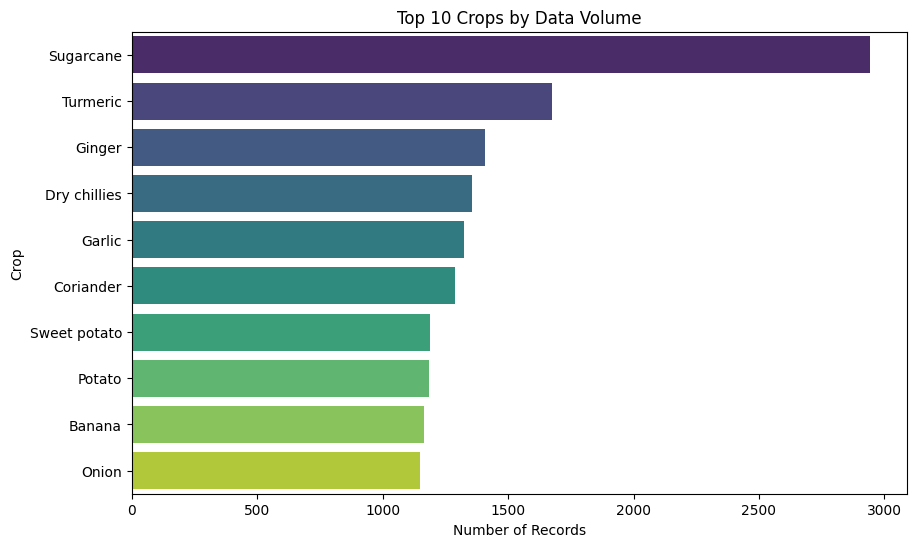

In [5]:



plt.figure(figsize=(10, 6))
top_crops = df['Crop'].value_counts().head(10)
sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')
plt.title('Top 10 Crops by Data Volume')
plt.xlabel('Number of Records')
plt.show()



B. Correlation Heatmap (Finding Patterns)

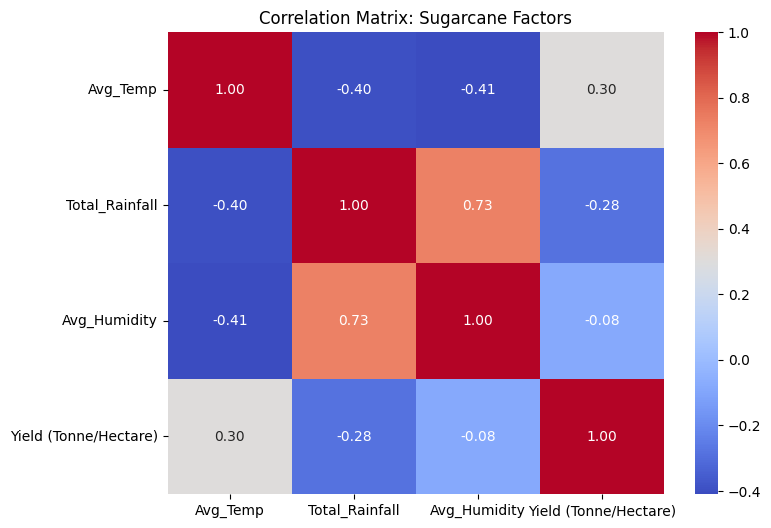

In [6]:

# Do Temp and Rain affect Yield? Let's check for Sugarcane.
sugar_df = df[df['Crop'] == 'Sugarcane']
corr_matrix = sugar_df[['Avg_Temp', 'Total_Rainfall', 'Avg_Humidity', 'Yield (Tonne/Hectare)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Sugarcane Factors')
plt.show()

 C. Distribution of Temperature (Histogram)

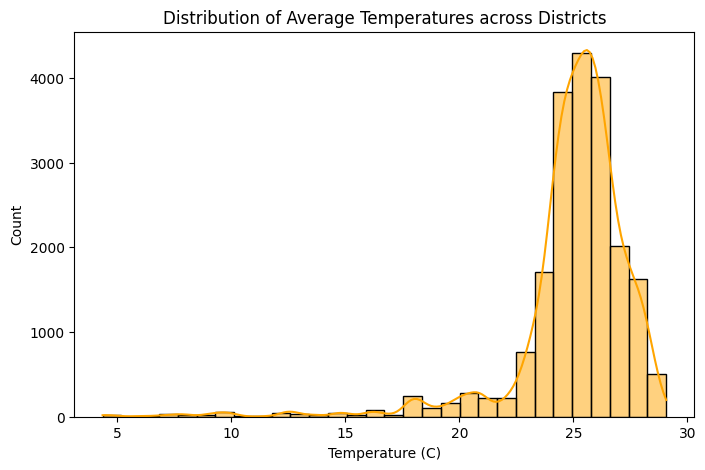

In [7]:
# C. Distribution of Temperature (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Temp'], bins=30, kde=True, color='orange')
plt.title('Distribution of Average Temperatures across Districts')
plt.xlabel('Temperature (C)')
plt.show()

 D. Rainfall vs Yield Scatter Plot

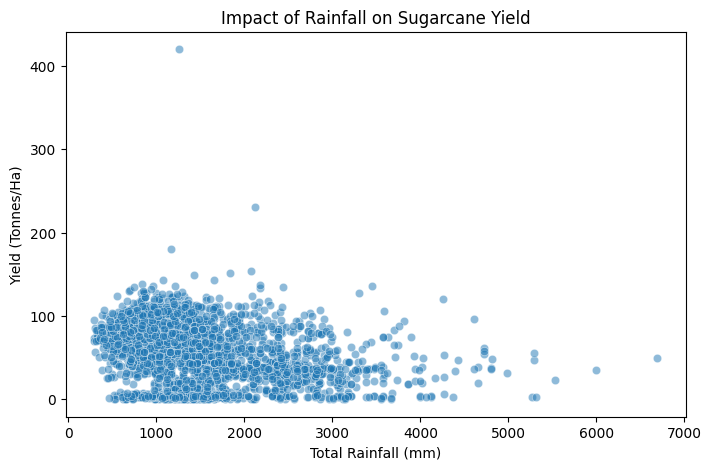

In [8]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sugar_df, x='Total_Rainfall', y='Yield (Tonne/Hectare)', alpha=0.5)
plt.title('Impact of Rainfall on Sugarcane Yield')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Yield (Tonnes/Ha)')
plt.show()